

#This project focuses on developing a predictive model for renewable energy generation, specifically targeting
  
Leveraging historical weather data (e.g., temperature, wind speed, solar irradiance, humidity) and potentially other relevant factors
 (e.g., time of day, seasonality, cloud cover), we aim to create a regression model capable of accurately forecasting energy output.  
 The model will be trained on a dataset of past energy generation and corresponding weather conditions.  
 Performance will be evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared, aiming to minimize prediction errors and maximize accuracy.  
 The resulting model can be used to optimize energy grid management, improve energy trading strategies, and facilitate more efficient integration of renewable energy sources into the power grid.  
 Further exploration may involve incorporating advanced techniques like time series analysis and feature engineering to enhance predictive capabilities.


In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
df=pd.read_csv('/content/drive/MyDrive/mini project /02 modern-renewable-energy-consumption.csv')

In [ ]:
df.columns

Index(['Entity', 'Code', 'Year', 'Geo Biomass Other - TWh',
       'Solar Generation - TWh', 'Wind Generation - TWh',
       'Hydro Generation - TWh'],
      dtype='object')

In [6]:
df.head(5)

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.164,0.0,0.0,26.013390
1,Africa,NaN,1972,0.165,0.0,0.0,29.633196
2,Africa,NaN,1973,0.170,0.0,0.0,31.345707
3,Africa,NaN,1974,0.175,0.0,0.0,35.667076
4,Africa,NaN,1975,0.172,0.0,0.0,37.717968


In [7]:
df=df.drop(columns=['Code'],axis=1)

In [8]:
df.describe()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
count,5610.000000,5466.000000,5442.000000,5445.000000,5603.000000
mean,1993.834759,13.455595,5.480776,15.027906,147.892846
std,16.301699,47.644151,39.895114,84.727689,390.187379
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,0.000000,0.000000,0.000000,1.368538
50%,1994.000000,0.227000,0.000000,0.000000,10.693000
75%,2008.000000,4.270843,0.017030,0.276075,65.841800
max,2021.000000,762.782650,1032.501200,1861.939800,4345.990000


#checking the null values

In [9]:
df.isnull().sum()

,0
Entity,0
Year,0
Geo Biomass Other - TWh,144
Solar Generation - TWh,168
Wind Generation - TWh,165
Hydro Generation - TWh,7


# Creating total modern renewable energy generation in each year

In [10]:
df['Total_energy']=df['Geo Biomass Other - TWh']+df['Solar Generation - TWh']+df['Wind Generation - TWh']+df['Hydro Generation - TWh']

In [11]:
df

,Entity,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Total_energy
0,Africa,1971,0.16400,0.00000,0.0000,26.013390,26.177390
1,Africa,1972,0.16500,0.00000,0.0000,29.633196,29.798196
2,Africa,1973,0.17000,0.00000,0.0000,31.345707,31.515707
3,Africa,1974,0.17500,0.00000,0.0000,35.667076,35.842076
4,Africa,1975,0.17200,0.00000,0.0000,37.717968,37.889968
...,...,...,...,...,...,...,...
5605,World,2017,596.42050,445.46628,1140.3931,4069.982700,6252.262580
5606,World,2018,643.03204,576.23090,1269.9792,4183.166500,6672.408640
5607,World,2019,674.74536,703.94977,1420.5441,4231.377000,7030.616230
5608,World,2020,703.91644,846.22940,1596.4282,4345.990000,7492.564040


#Plotting the graphs for all the energy data of countries


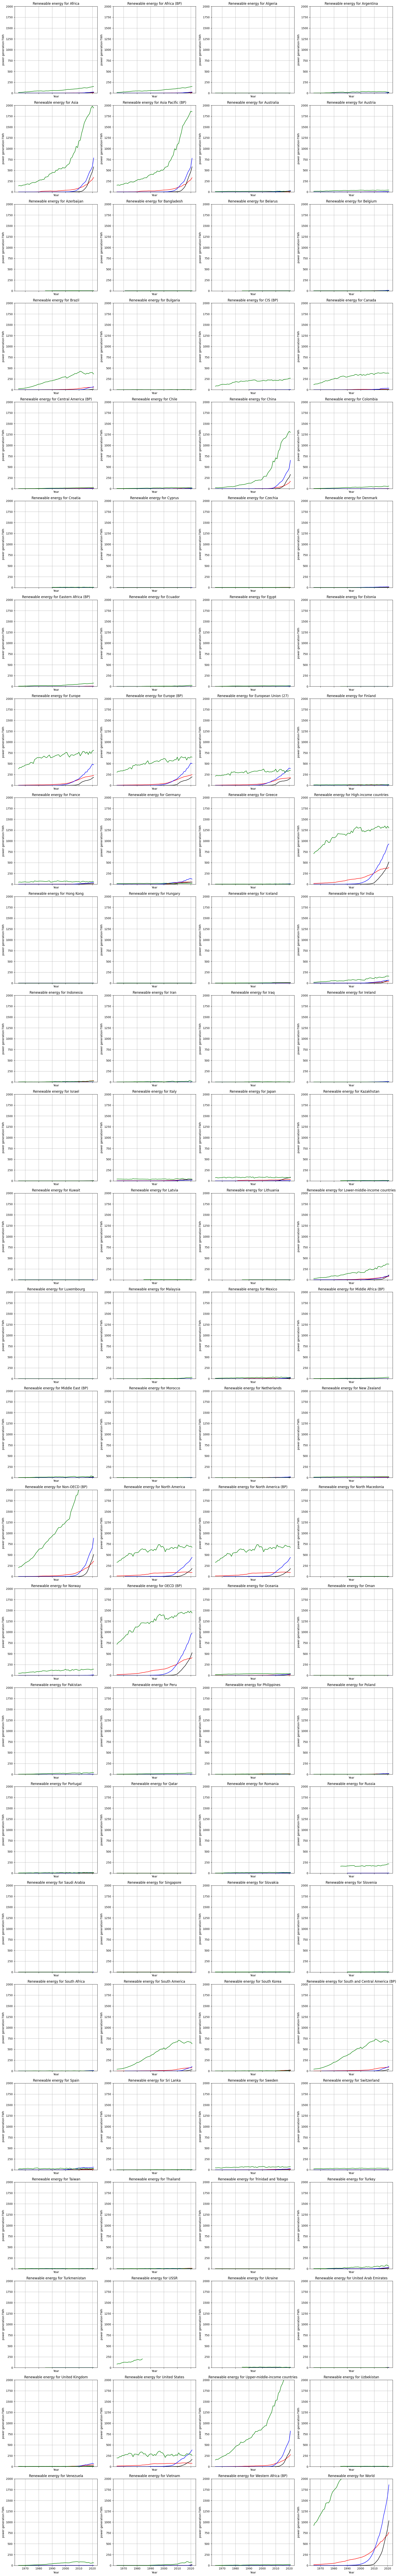

In [12]:
entities = df['Entity'].unique()

num_entities = len(entities)
nrows = math.ceil(num_entities / 4)

fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5*nrows), sharex=True)
axes = axes.flatten()

for i, entity in enumerate(entities):
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data.sort_values('Year')

    axes[i].plot(entity_data['Year'], entity_data['Geo Biomass Other - TWh'],color='red')
    axes[i].plot(entity_data['Year'], entity_data['Solar Generation - TWh'],color='black')
    axes[i].plot(entity_data['Year'], entity_data['Wind Generation - TWh'],color='blue')
    axes[i].plot(entity_data['Year'], entity_data['Hydro Generation - TWh'],color='green')

    axes[i].set_title(f'Renewable energy for {entity}')
    axes[i].set_ylabel('power generation-TWh')
    axes[i].set_xlabel('Year')
    axes[i].set_ylim(1965,2021)
    axes[i].set_ylim(0,2000)
    axes[i].grid(True)

for j in range(len(entities), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# seprating countries to different categories

In [13]:
Countries=['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria','Canada', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark','Ecuador', 'Egypt', 'Estonia','Finland', 'France',
       'Germany', 'Greece', 'Hong Kong','Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait','Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand','North Macedonia', 'Norway', 'Oman','Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia','Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden','Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine','United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela','Vietnam']

Entities_income=['High-income countries', 'Lower-middle-income countries','Upper-middle-income countries']

Continent=['Africa','Asia','Central America (BP)', 'Europe','North America', 'South America','Oceania']

World= ['World']

#Geo Biomass power generated in countries

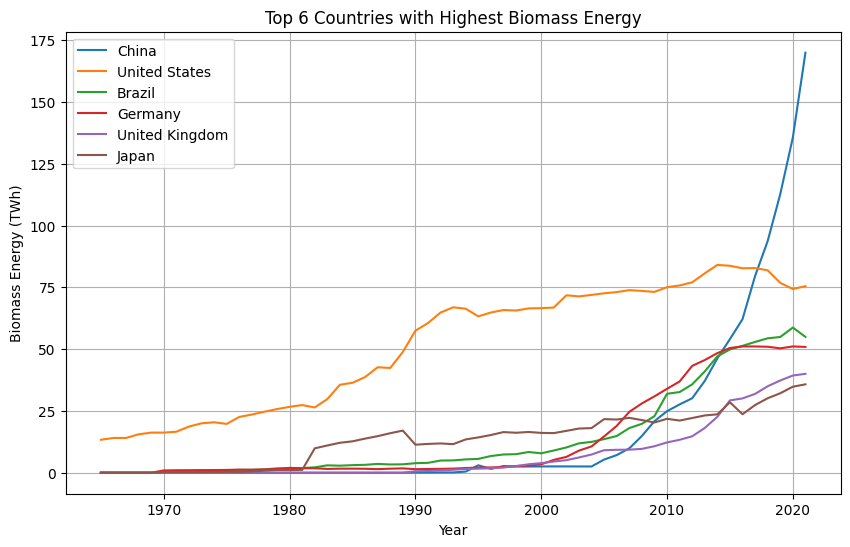

In [14]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Geo Biomass Other - TWh']].sort_values(by='Geo Biomass Other - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Geo Biomass Other - TWh'], label=country)

plt.xlabel('Year')
plt.ylabel('Biomass Energy (TWh)')
plt.title('Top 6 Countries with Highest Biomass Energy')
plt.legend()
plt.grid(True)
plt.show()

#pie chart of biomass share

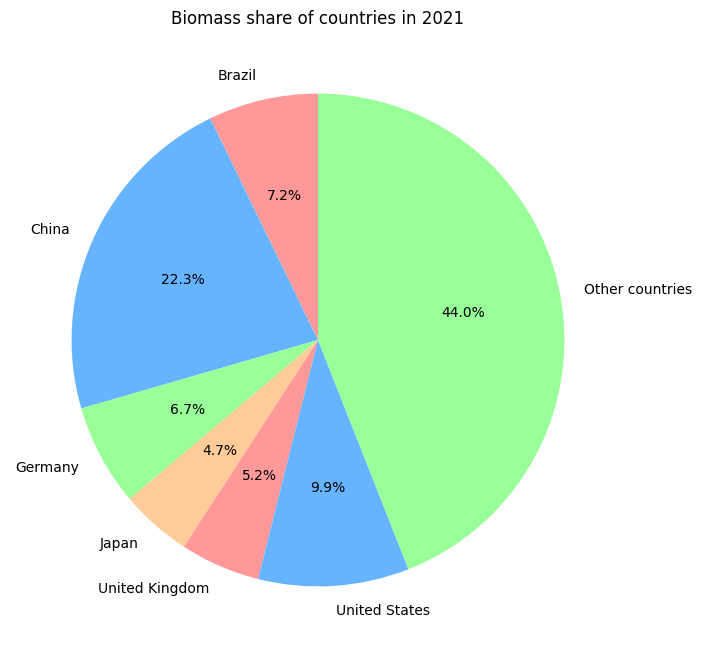

In [15]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]
top_6_countries = filtered_2021_df[['Entity', 'Geo Biomass Other - TWh']].sort_values(by='Geo Biomass Other - TWh', ascending=False).head(6)['Entity']
filtered_df = df[(df['Entity'].isin(top_6_countries)) & (df['Year'] == 2021)][['Entity', 'Geo Biomass Other - TWh']]
world_2021=df[(df['Entity']=='World') & (df['Year'] == 2021)]['Geo Biomass Other - TWh'].values[0]
filtered_df['Geo Biomass Other - TWh']=filtered_df['Geo Biomass Other - TWh']/ world_2021*100
other_value=100-filtered_df['Geo Biomass Other - TWh'].sum()

other_row = pd.DataFrame({'Entity': ['Other countries'], 'Geo Biomass Other - TWh': [other_value]})

filtered_df = pd.concat([filtered_df, other_row], ignore_index=True)

plt.figure(figsize=(10,8))
plt.pie(filtered_df['Geo Biomass Other - TWh'],
        labels=filtered_df['Entity'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Biomass share of countries in 2021')
plt.show()

#income based generation of biomass in countries

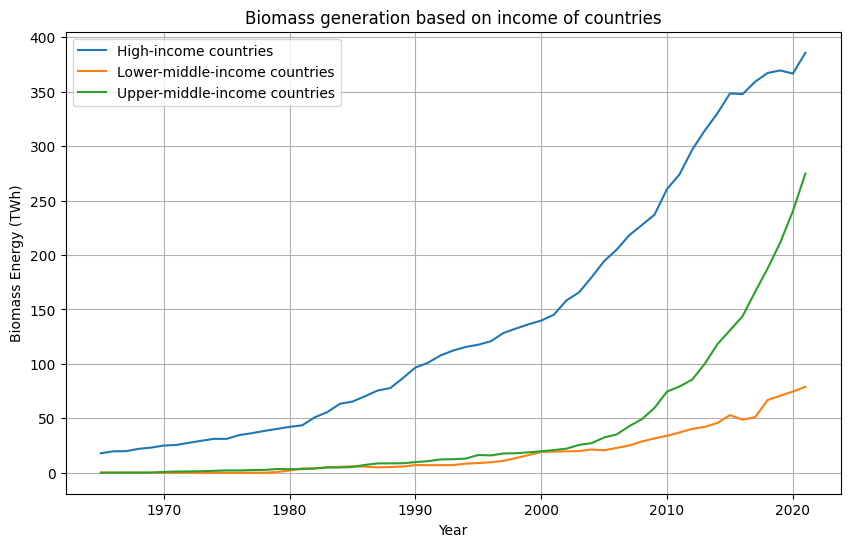

In [16]:
plt.figure(figsize=(10, 6))
for entity in Entities_income:
    country_data = df[df['Entity'] == entity]
    plt.plot(country_data['Year'], country_data['Geo Biomass Other - TWh'], label=entity)

plt.xlabel('Year')
plt.ylabel('Biomass Energy (TWh)')
plt.title('Biomass generation based on income of countries')
plt.legend()
plt.grid(True)
plt.show()

#solar power generation and top countries with solar power generation

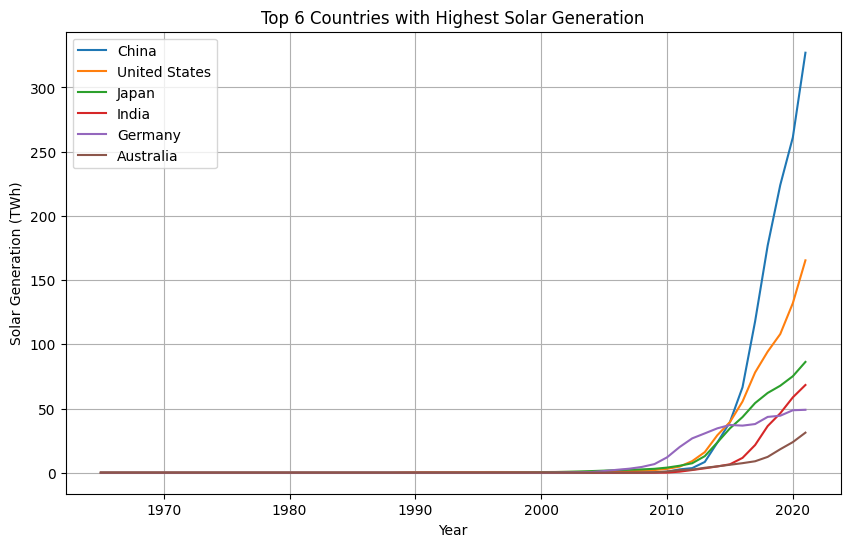

In [17]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Solar Generation - TWh']].sort_values(by='Solar Generation - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Solar Generation - TWh'], label=country)

plt.xlabel('Year')
plt.ylabel('Solar Generation (TWh)')
plt.title('Top 6 Countries with Highest Solar Generation')
plt.legend()
plt.grid(True)
plt.show()

#solar energy share of 2021

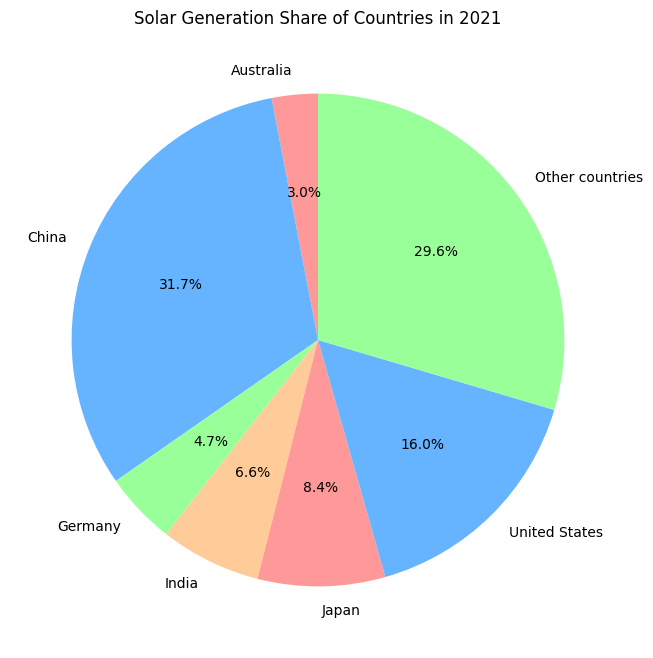

In [18]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Solar Generation - TWh']].sort_values(by='Solar Generation - TWh', ascending=False).head(6)['Entity']

filtered_df = df[(df['Entity'].isin(top_6_countries)) & (df['Year'] == 2021)][['Entity', 'Solar Generation - TWh']]

world_2021 = df[(df['Entity'] == 'World') & (df['Year'] == 2021)]['Solar Generation - TWh'].values[0]

filtered_df['Solar Generation - TWh'] = filtered_df['Solar Generation - TWh'] / world_2021 * 100

other_value = 100 - filtered_df['Solar Generation - TWh'].sum()

other_row = pd.DataFrame({'Entity': ['Other countries'], 'Solar Generation - TWh': [other_value]})

filtered_df = pd.concat([filtered_df, other_row], ignore_index=True)

plt.figure(figsize=(10, 8))
plt.pie(filtered_df['Solar Generation - TWh'],
        labels=filtered_df['Entity'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Solar Generation Share of Countries in 2021')

plt.show()

#income based solar energy generation

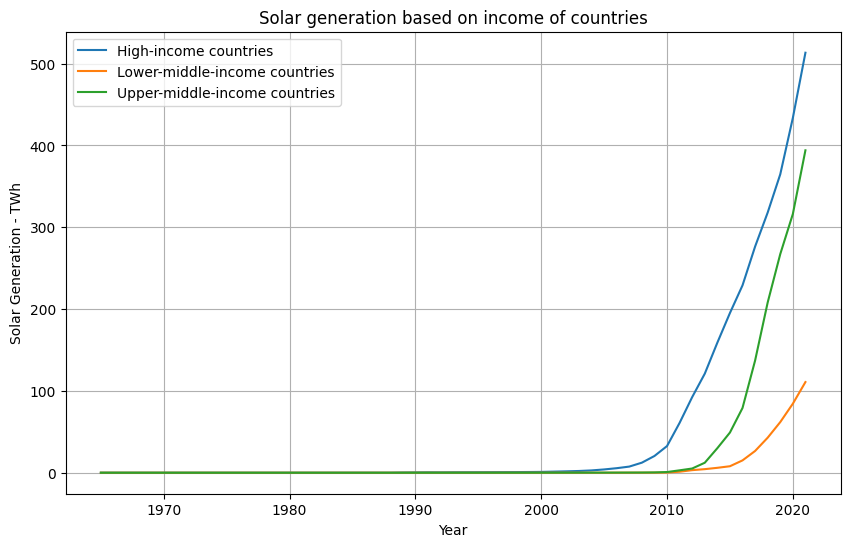

In [19]:
plt.figure(figsize=(10, 6))
for entity in Entities_income:
    country_data = df[df['Entity'] == entity]
    plt.plot(country_data['Year'], country_data['Solar Generation - TWh'], label=entity)

plt.xlabel('Year')
plt.ylabel('Solar Generation - TWh')
plt.title('Solar generation based on income of countries')
plt.legend()
plt.grid(True)
plt.show()

#wind energy generation

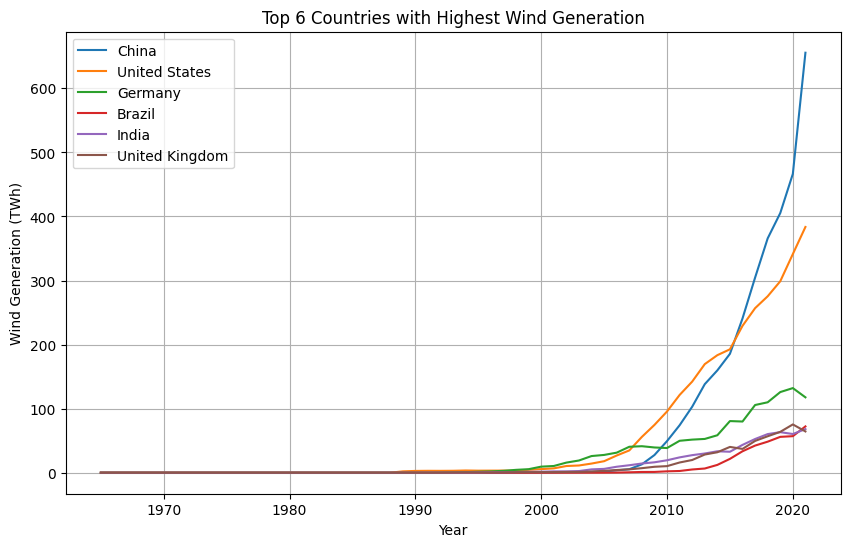

In [20]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Wind Generation - TWh']].sort_values(by='Wind Generation - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=country)

plt.xlabel('Year')
plt.ylabel('Wind Generation (TWh)')
plt.title('Top 6 Countries with Highest Wind Generation')
plt.legend()
plt.grid(True)
plt.show()

#wind energy share in 2021

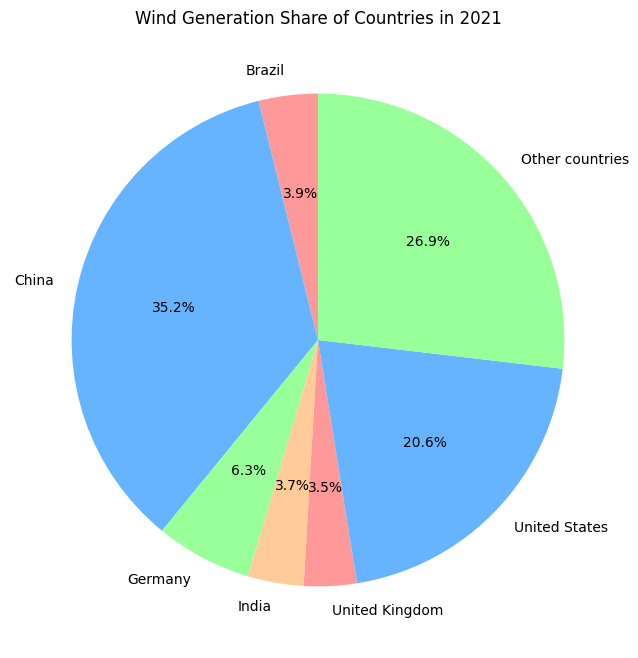

In [21]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Wind Generation - TWh']].sort_values(by='Wind Generation - TWh', ascending=False).head(6)['Entity']

filtered_df = df[(df['Entity'].isin(top_6_countries)) & (df['Year'] == 2021)][['Entity', 'Wind Generation - TWh']]

world_2021 = df[(df['Entity'] == 'World') & (df['Year'] == 2021)]['Wind Generation - TWh'].values[0]

filtered_df['Wind Generation - TWh'] = filtered_df['Wind Generation - TWh'] / world_2021 * 100

other_value = 100 - filtered_df['Wind Generation - TWh'].sum()

other_row = pd.DataFrame({'Entity': ['Other countries'], 'Wind Generation - TWh': [other_value]})

filtered_df = pd.concat([filtered_df, other_row], ignore_index=True)

plt.figure(figsize=(10, 8))
plt.pie(filtered_df['Wind Generation - TWh'],
        labels=filtered_df['Entity'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Wind Generation Share of Countries in 2021')

plt.show()

#income based wind energy generation

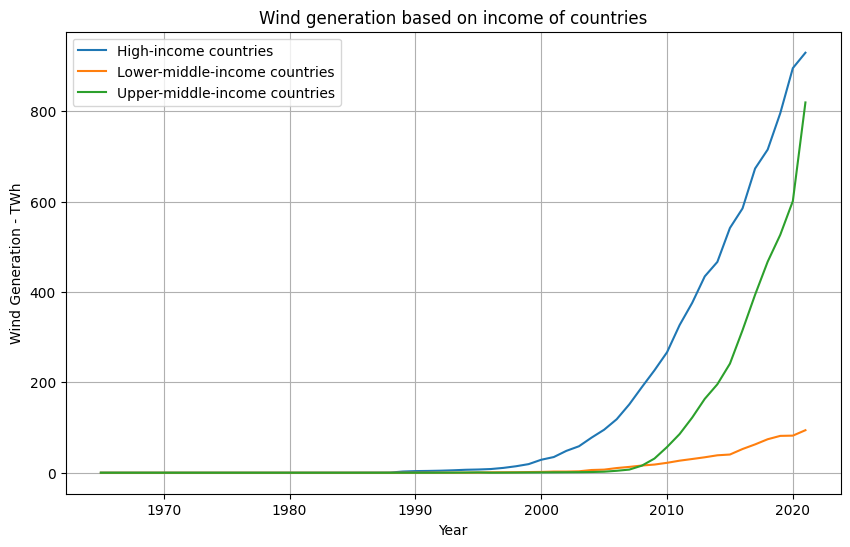

In [22]:
plt.figure(figsize=(10, 6))
for entity in Entities_income:
    country_data = df[df['Entity'] == entity]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=entity)

plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.title('Wind generation based on income of countries')
plt.legend()
plt.grid(True)
plt.show()

#hydropower generation in all countries

In [ ]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Wind Generation - TWh']].sort_values(by='Wind Generation - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=country)


plt.xlabel('Year')
plt.ylabel('Wind Generation (TWh)')
plt.title('Top 6 Countries with Highest Wind Generation')
plt.legend()
plt.grid(True)
plt.show()

#top countries which generate wind energy


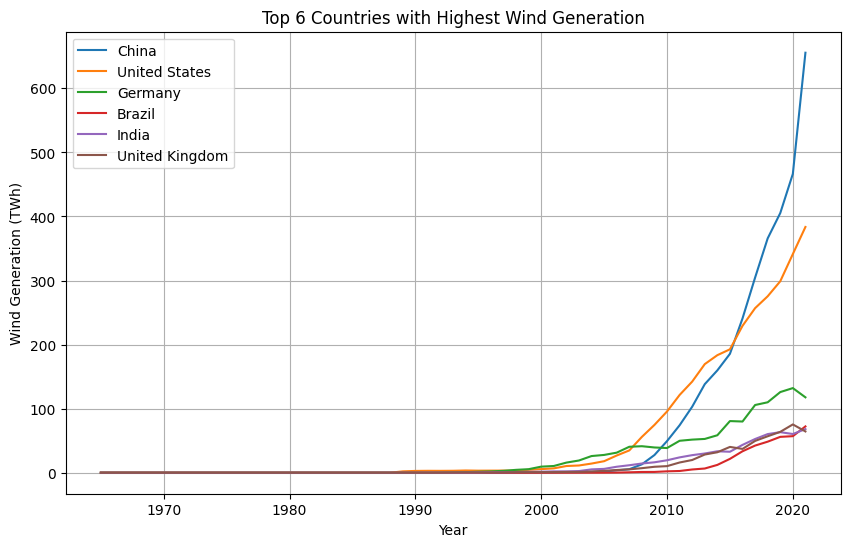

In [23]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Wind Generation - TWh']].sort_values(by='Wind Generation - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=country)


plt.xlabel('Year')
plt.ylabel('Wind Generation (TWh)')
plt.title('Top 6 Countries with Highest Wind Generation')
plt.legend()
plt.grid(True)
plt.show()

#highest hydropower generating countries

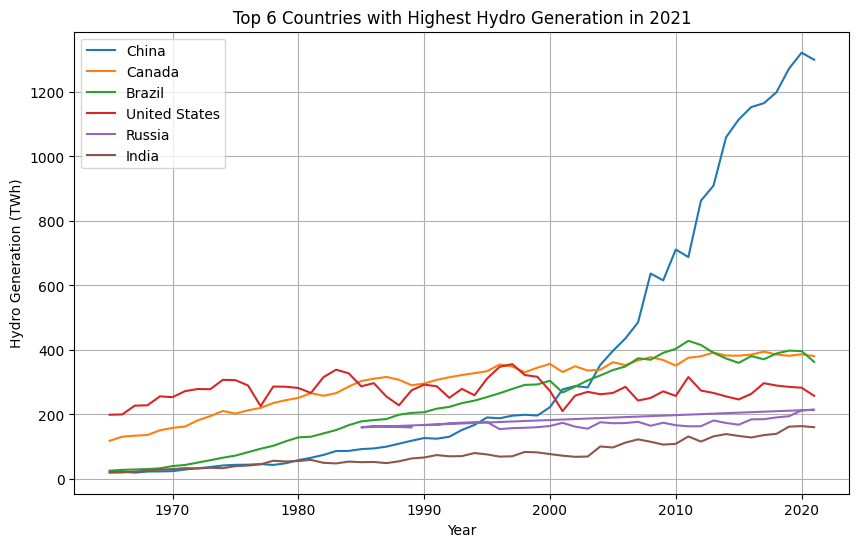

In [24]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Hydro Generation - TWh']].sort_values(by='Hydro Generation - TWh', ascending=False).head(6)['Entity']

top_6_df = df[df['Entity'].isin(top_6_countries)]

plt.figure(figsize=(10, 6))
for country in top_6_countries:
    country_data = top_6_df[top_6_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Hydro Generation - TWh'], label=country)

plt.xlabel('Year')
plt.ylabel('Hydro Generation (TWh)')
plt.title('Top 6 Countries with Highest Hydro Generation in 2021')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.columns

Index(['Entity', 'Year', 'Geo Biomass Other - TWh', 'Solar Generation - TWh',
       'Wind Generation - TWh', 'Hydro Generation - TWh', 'Total_energy'],
      dtype='object')

#hydropower generation share of countries in 2021

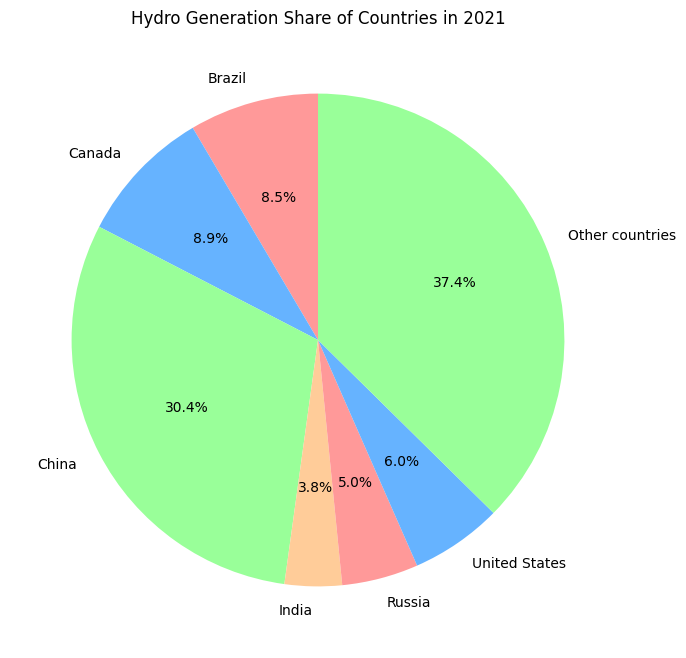

In [26]:
filtered_2021_df = df[(df['Entity'].isin(Countries)) & (df['Year'] == 2021)]

top_6_countries = filtered_2021_df[['Entity', 'Hydro Generation - TWh']].sort_values(by='Hydro Generation - TWh', ascending=False).head(6)['Entity']

filtered_df = df[(df['Entity'].isin(top_6_countries)) & (df['Year'] == 2021)][['Entity', 'Hydro Generation - TWh']]

world_2021 = df[(df['Entity'] == 'World') & (df['Year'] == 2021)]['Hydro Generation - TWh'].values[0]

filtered_df['Hydro Generation - TWh'] = filtered_df['Hydro Generation - TWh'] / world_2021 * 100

other_value = 100 - filtered_df['Hydro Generation - TWh'].sum()

other_row = pd.DataFrame({'Entity': ['Other countries'], 'Hydro Generation - TWh': [other_value]})

filtered_df = pd.concat([filtered_df, other_row], ignore_index=True)

plt.figure(figsize=(10, 8))
plt.pie(filtered_df['Hydro Generation - TWh'],
        labels=filtered_df['Entity'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Hydro Generation Share of Countries in 2021')

plt.show()

#hydropower generation based on income of countries


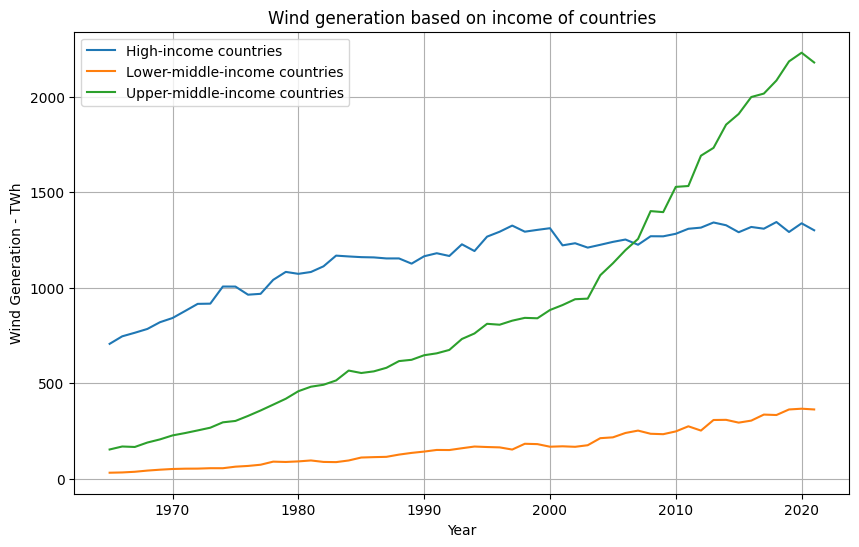

In [27]:
plt.figure(figsize=(10, 6))
for entity in Entities_income:
    country_data = df[df['Entity'] == entity]
    plt.plot(country_data['Year'], country_data['Hydro Generation - TWh'], label=entity)

plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.title('Wind generation based on income of countries')
plt.legend()
plt.grid(True)
plt.show()

#model for prediction / forecasting of renewable energy generation in future

we know that the highest production of renewable energy is by USA , CHINA  therefore we will be using regression model and predict the future generation renewable energy in the whole world as well as usa , china etc


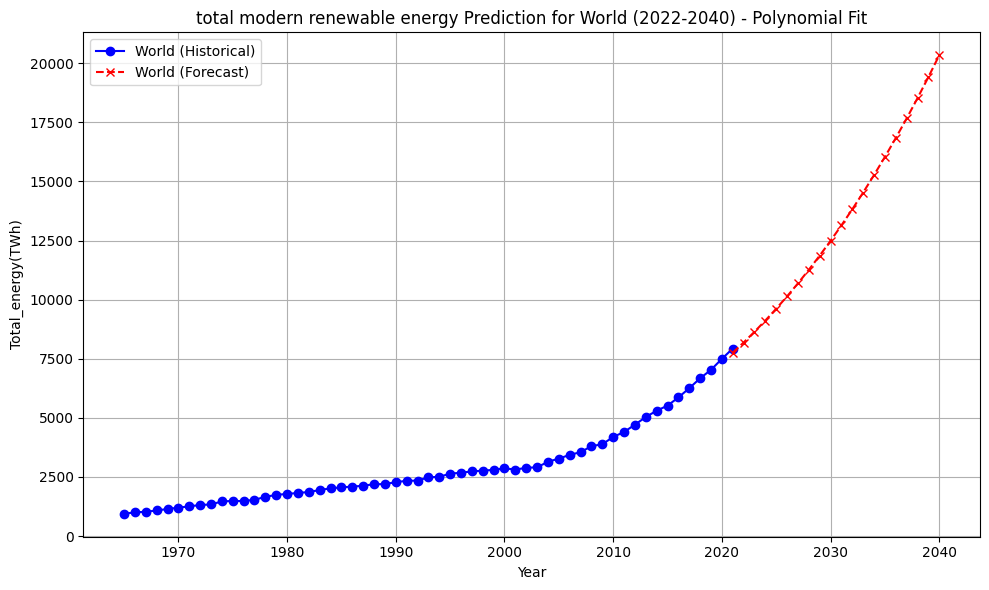

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 16732.8233909467
Mean Absolute Error (MAE): 112.13052094986234
R-squared (R²): 0.9944855797181025


In [28]:
world_data = df[df['Entity'] == 'World']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculating  error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecasting  future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast of the energy being produced
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='World (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='World (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy(TWh)')
plt.title('total modern renewable energy Prediction for World (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

#prediction for china alone

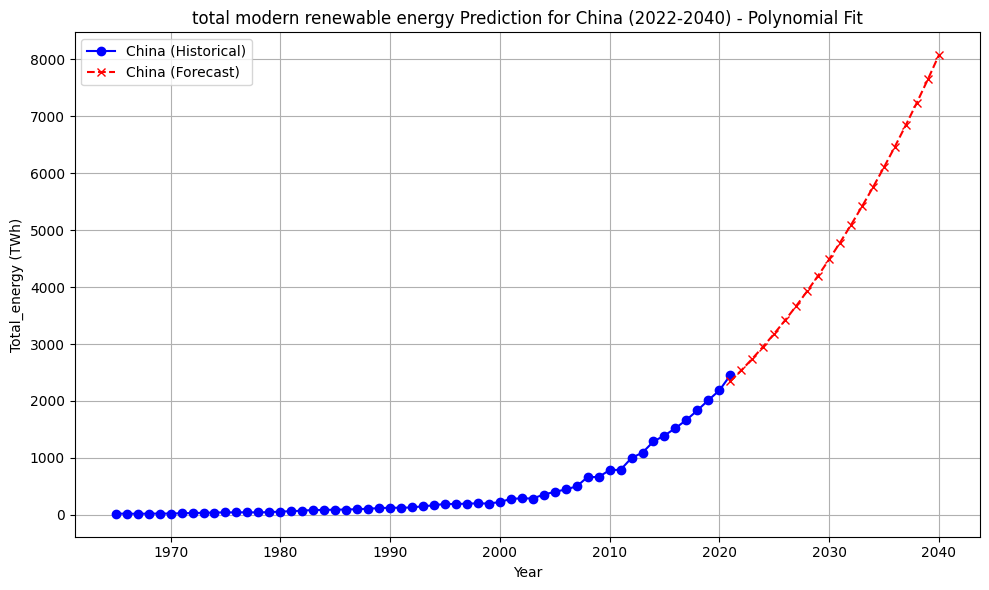

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 2749.905933605503
Mean Absolute Error (MAE): 43.45674205948378
R-squared (R²): 0.992712532266012


In [29]:
world_data = df[df['Entity'] == 'China']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecast future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='China (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='China (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy (TWh)')
plt.title('total modern renewable energy Prediction for China (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

#prediction for US

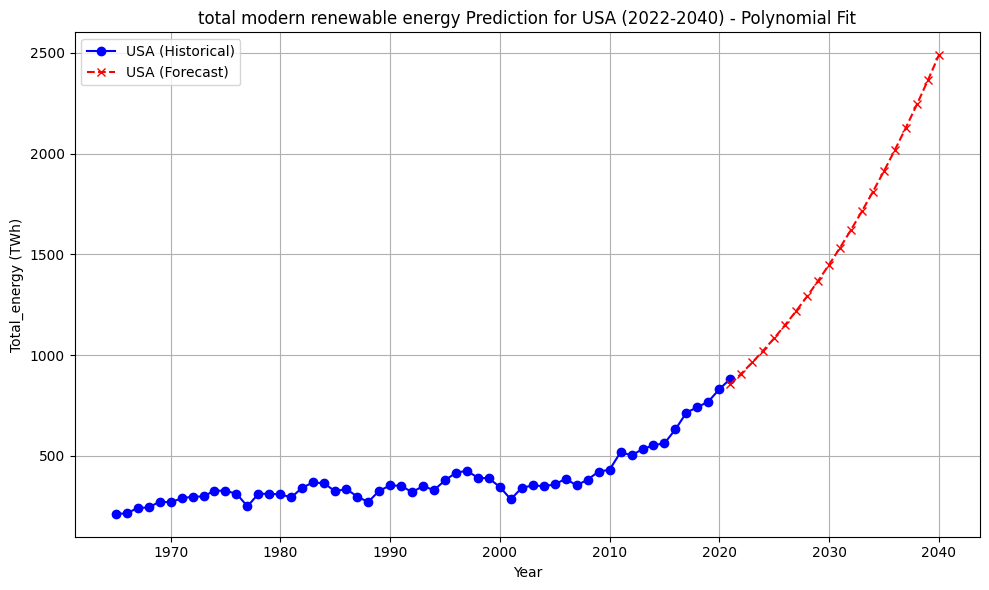

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 1174.0788667001843
Mean Absolute Error (MAE): 25.943694414345316
R-squared (R²): 0.9473924387476576


In [30]:
world_data = df[df['Entity'] == 'United States']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecast future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='USA (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='USA (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy (TWh)')
plt.title('total modern renewable energy Prediction for USA (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

#Prediction for argentina

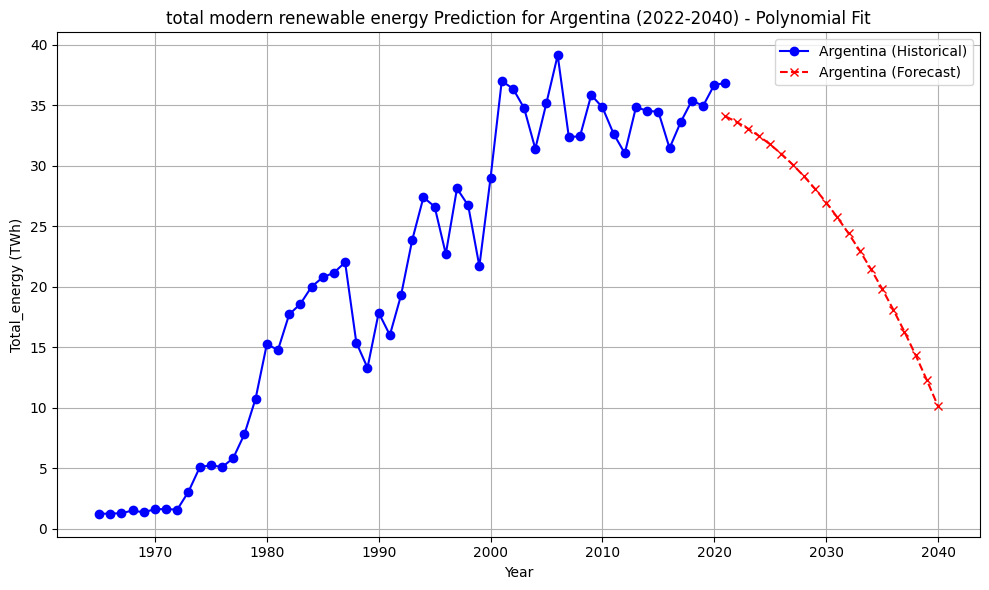

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 9.793269058399655
Mean Absolute Error (MAE): 2.520464012236195
R-squared (R²): 0.938298804023394


In [31]:
world_data = df[df['Entity'] == 'Argentina']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecast future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='Argentina (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='Argentina (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy (TWh)')
plt.title('total modern renewable energy Prediction for Argentina (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

#prediction / forecasting for INDIA


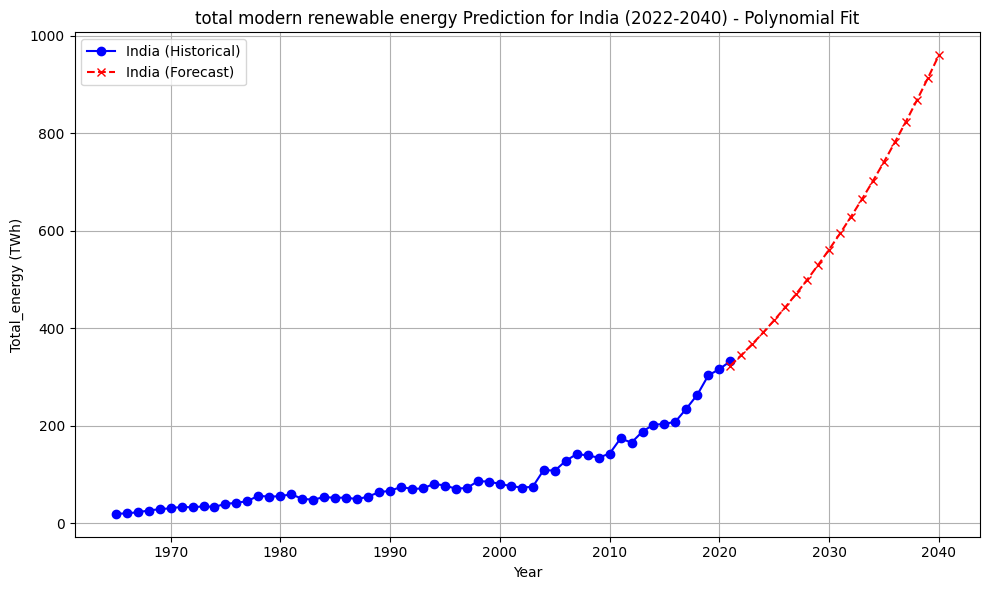

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 89.23694486254969
Mean Absolute Error (MAE): 7.632289504648965
R-squared (R²): 0.9850608609375503


In [32]:
world_data = df[df['Entity'] == 'India']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecast future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='India (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='India (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy (TWh)')
plt.title('total modern renewable energy Prediction for India (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

#prediction and forecasting for indonasia

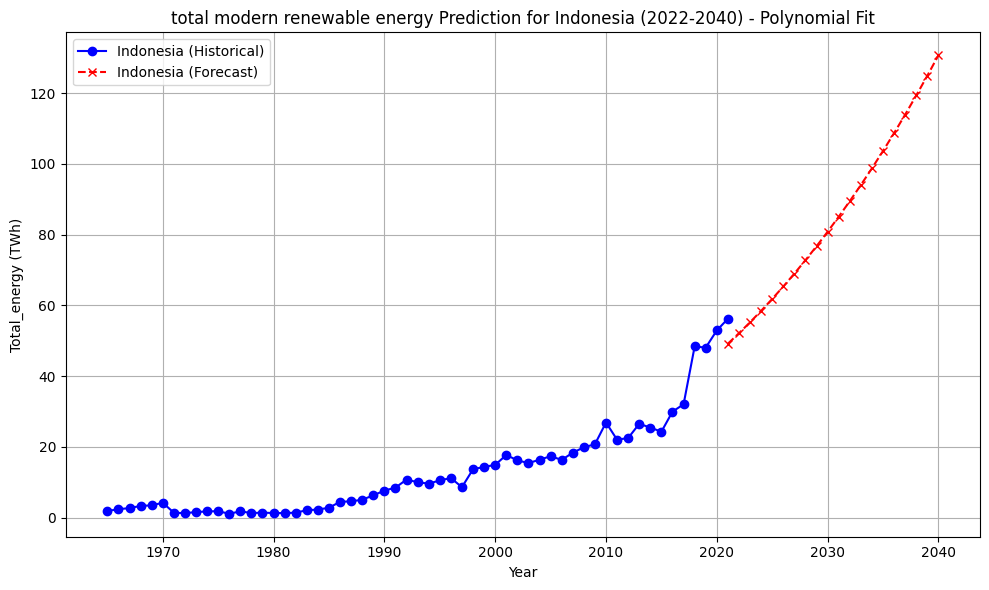

Model Error for World (Polynomial Regression):
Mean Squared Error (MSE): 11.124614923104206
Mean Absolute Error (MAE): 2.634367387683412
R-squared (R²): 0.9398487446556704


In [33]:
world_data = df[df['Entity'] == 'Indonesia']

X = world_data['Year'].values.reshape(-1, 1)
y = world_data['Total_energy'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Calculate error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Forecast future values
last_year = X[-1][0]
future_years = np.arange(last_year, 2041).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(world_data['Year'], y, marker='o', color='blue', label='Indonesia (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='Indonesia (Forecast)', marker='x')

plt.xlabel('Year')
plt.ylabel('Total_energy (TWh)')
plt.title('total modern renewable energy Prediction for Indonesia (2022-2040) - Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the model error metrics
print("Model Error for World (Polynomial Regression):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")